## This is not a text

In [7]:
from pomegranate import *
import pygraphviz
import numpy as np
import matplotlib.pyplot as plt

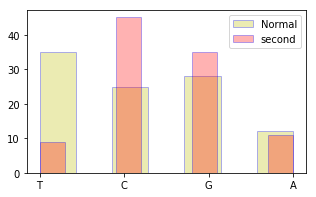

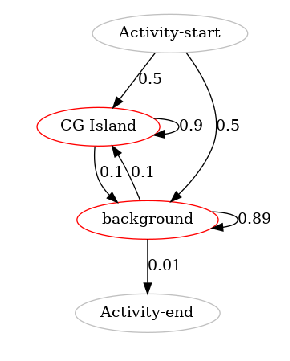

In [59]:
seq = list('CGACTACTGACTACTCGCCGACGCGACTGCCGTCTATACTGCGCATACGGC')

d1 = DiscreteDistribution({'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25})
d2 = DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10})
plt.figure( figsize=(5,3))
d1.plot( n=100, edgecolor='b', facecolor='y', bins=7, alpha=0.3, label="Normal" )
d2.plot( n=100, edgecolor='b', facecolor='r', bins=10, alpha=0.3, label="second" )
plt.legend()

# General Mixture Model Setup
gmm = GeneralMixtureModel( [d1, d2] )

# Hidden Markov Model Setup
s1 = State( d1, name='background' )
s2 = State( d2, name='CG Island' )

hmm = HiddenMarkovModel('Activity')
hmm.add_states(s1, s2)
hmm.add_transition( hmm.start, s1, 0.5 )
hmm.add_transition( hmm.start, s2, 0.5 )
hmm.add_transition( s1, s1, 0.89 )
hmm.add_transition( s1, s2, 0.10 )
hmm.add_transition( s1, hmm.end, 0.01 )
hmm.add_transition( s2, s1, 0.1 )
hmm.add_transition( s2, s2, 0.9 )
hmm.bake()

plt.figure( figsize=(10,6) )
hmm.plot()


In [29]:
gmm_predictions = gmm.predict( np.array(seq) )
hmm_predictions = hmm.predict( seq )


print("sequence: {}".format( ''.join( seq ) ) )
print("gmm pred: {}".format( ''.join( map( str, gmm_predictions ) ) ) )
print("hmm pred: {}".format( ''.join( map( str, hmm_predictions ) ) ) )
print("")
print("hmm state 0: {}".format( hmm.states[0].name ))
print("hmm state 1: {}".format( hmm.states[1].name ))

sequence: CGACTACTGACTACTCGCCGACGCGACTGCCGTCTATACTGCGCATACGGC
gmm pred: 000000000000000000000000000000000000000000000000000
hmm pred: 111111111111111000000000000000011111111111111111111

hmm state 0: CG Island
hmm state 1: background


In [81]:
trans, ems = hmm.forward_backward( seq )

In [82]:
import pandas as pd
def np_arr_to_df(np_data,labels):
    return pd.DataFrame(np_data,index=labels, columns=labels)
    

In [88]:
df_trans = np_arr_to_df(trans, ['background', 'CG-Island', 'aasd','asdf'])
print(df_trans)

            background  CG-Island  aasd  asdf
background   15.781006   2.895593   0.0   0.0
CG-Island     2.412888  28.910514   0.0   1.0
aasd          0.482705   0.517295   0.0   0.0
asdf          0.000000   0.000000   0.0   0.0


            background  CG-Island  aasd  asdf
background   15.781006   2.895593   0.0   0.0
CG-Island     2.412888  28.910514   0.0   1.0
aasd          0.482705   0.517295   0.0   0.0
asdf          0.000000   0.000000   0.0   0.0
